In [319]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [320]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [321]:
all_df[:2]

,Number of times pregnant,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [322]:
all_df[:2]

,Number of times pregnant,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [323]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df=all_df[msk]
test_df=all_df[~msk]

In [324]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df)) 

total: 768 train: 616 test: 152


In [325]:
all_df.isnull().sum()

Number of times pregnant    0
Unnamed: 1                  0
Unnamed: 2                  0
Unnamed: 3                  0
Unnamed: 4                  0
Unnamed: 5                  0
Unnamed: 6                  0
Unnamed: 7                  0
Unnamed: 8                  0
dtype: int64

In [326]:
def PreprocessData(raw_df):
    
    ndarray= all_df.values
    Features=ndarray[:,1:] 
    Label=ndarray[:,8]
    
    from sklearn import preprocessing
    minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures=minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

In [327]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [328]:
train_Features[:4]

array([[0.74371859, 0.59016393, 0.35353535, 0.        , 0.50074516,
        0.23441503, 0.48333333, 1.        ],
       [0.42713568, 0.54098361, 0.29292929, 0.        , 0.39642325,
        0.11656704, 0.16666667, 0.        ],
       [0.91959799, 0.52459016, 0.        , 0.        , 0.34724292,
        0.25362938, 0.18333333, 1.        ],
       [0.44723618, 0.54098361, 0.23232323, 0.11111111, 0.41877794,
        0.03800171, 0.        , 0.        ]])

In [329]:
train_Label[:4]

array([1., 0., 1., 0.])

In [330]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [331]:
model=Sequential() 

In [332]:
model.add(Embedding(input_dim=8,output_dim=1))

In [333]:
model.add(SimpleRNN(units=4))

In [334]:
model.add(Dense(1, activation = "sigmoid"))

In [335]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 1)           8         
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 4)                 24        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [336]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [337]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=20, 
                         batch_size=40,verbose=2)

Train on 614 samples, validate on 154 samples
Epoch 1/20
 - 1s - loss: 0.6873 - acc: 0.6743 - val_loss: 0.6811 - val_acc: 0.6429
Epoch 2/20
 - 0s - loss: 0.6743 - acc: 0.6531 - val_loss: 0.6679 - val_acc: 0.6429
Epoch 3/20
 - 0s - loss: 0.6594 - acc: 0.6531 - val_loss: 0.6541 - val_acc: 0.6429
Epoch 4/20
 - 0s - loss: 0.6460 - acc: 0.6531 - val_loss: 0.6458 - val_acc: 0.6429
Epoch 5/20
 - 0s - loss: 0.6392 - acc: 0.6531 - val_loss: 0.6417 - val_acc: 0.6429
Epoch 6/20
 - 0s - loss: 0.6346 - acc: 0.6531 - val_loss: 0.6381 - val_acc: 0.6429
Epoch 7/20
 - 0s - loss: 0.6306 - acc: 0.6531 - val_loss: 0.6338 - val_acc: 0.6429
Epoch 8/20
 - 0s - loss: 0.6258 - acc: 0.6531 - val_loss: 0.6288 - val_acc: 0.6429
Epoch 9/20
 - 0s - loss: 0.6204 - acc: 0.6531 - val_loss: 0.6227 - val_acc: 0.6429
Epoch 10/20
 - 0s - loss: 0.6137 - acc: 0.6531 - val_loss: 0.6144 - val_acc: 0.6429
Epoch 11/20
 - 0s - loss: 0.6053 - acc: 0.6531 - val_loss: 0.6053 - val_acc: 0.6429
Epoch 12/20
 - 0s - loss: 0.5956 - acc:

In [338]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train],color='blue')
    plt.plot(train_history.history[validation],color='magenta')
    plt.title('Train_history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

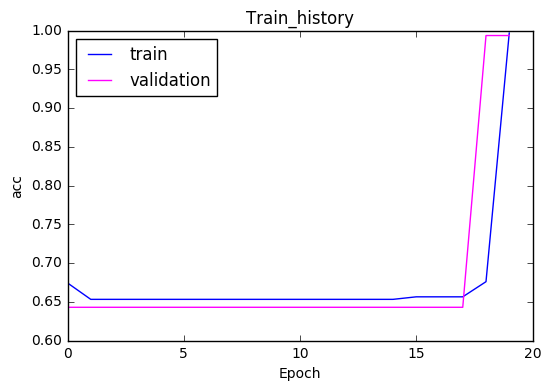

In [339]:
show_train_history(train_history,'acc','val_acc')

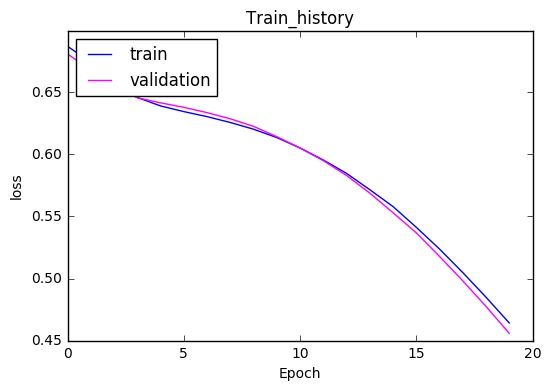

In [340]:
show_train_history(train_history,'loss','val_loss')

In [341]:
scores=model.evaluate(x=test_Features,
                     y=test_Label)

768/768 [==============================] - 0s 121us/step


In [342]:
scores[1]

0.99609375

In [343]:
probility=model.predict(test_Features)

In [344]:
probility[:10]

array([[0.5221181 ],
       [0.29289952],
       [0.5221181 ],
       [0.29289952],
       [0.5221181 ],
       [0.29289952],
       [0.5221181 ],
       [0.29289952],
       [0.5221181 ],
       [0.5221181 ]], dtype=float32)